<a href="https://colab.research.google.com/github/eridanletalis/probability_and_statistics/blob/master/prob_hw5_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np


1. Когда используется критерий Стьюдента, а когда Z –критерий?


Оба критерия являются параметрическими критериями. Оба критерия требуют, чтобы выборки имели нормальное распределение.
Z критерий или критерий Фишера используется, когда известна дисперсия ($σ$) генеральной совокупности
t-критерий, или критерий Стьюдента, используется, когда дисперсия генеральной совокупности неизвестна.

2. Проведите тест гипотезы. Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм.
Используя односторонний критерий с α=0,05, проверить эту гипотезу, если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 кв. мм.

В задаче нам известена дисперсия, поэтому можно использовать Z-критерий.
Для этого используем формулу для подсчёта значения наблюдаемого критирия

$$Z_{н} = \frac{\bar{X}-μ}{\sigma / {\sqrt(n)}}$$

при $α = 0.05$

Нам известно:
$$
n = 100, 
\bar{X} = 17.5, 
σ = 2
$$

Формулируем гипотезы
$H_{0}: $ наблюдаемый средний диаметр шариков принадлежит генеральной совокупности
$H_{1}: $ наблюдаемый средний диаметр шариков больше, чем среднее генеральной совокупности.

Сначала рассчитаем, как далеко 17.5 находятся от 17. Расстояние равно 0.5. Считаем, в скольких стандартных отклонениях находится 0.5 от среднего.

Считаем стандартное отклонение, как $\frac{\sigma}{\sqrt{n}} = 2 / 10 = 0.2$

Далее  $\bar{X}-μ$ делим на $0.2$, получаем $2.5$
Ищем табличное значение для Z критерия для $α=0.05$
$Z_{0.05} = 1.645$


Так как расчётное значение больше, чем значение Z-критерия для выбранной значимости, то *нулевую гипотезу стоит отвергнуть*


3. Проведите тест гипотезы. Продавец утверждает, что средний вес пачки печенья составляет 200 г.
Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет:
202, 203, 199, 197, 195, 201, 200, 204, 194, 190.
Известно, что их веса распределены нормально.
Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%? (Провести двусторонний тест.)

В этом примере следует использовать двусторонний критерий.

Формулируем нулевую гипотезу
$H_{0}: \mu = 200$ 
и альтернативную
$H_{1}: \mu \neq 200 $
для уровня значимости $α=0.01$

Так как нам не изветсна сигма, то используем t-критерий (критерий Стьюдента).

In [2]:

X = np.array([202, 203, 199, 197, 195, 201, 200, 204, 194, 190])
n = len(X)
mu = 200
a = 0.01
print(f"Среднее {X.mean():.4f}, исправленная дисперсия {X.var(ddof=1):.4f}")
s = np.sqrt(X.var(ddof=1))
# 
t_kr = 3.25 # таблица, a = 0.005, k = 9
M = X.mean()
t_nabl = (M - mu) * np.sqrt(n)/s

if abs(t_nabl) > t_kr:  # по модулю, т.к. критерий двусторонний
    print("Отвергаем нулевую гипотезу")
else:
    print("Принимаем нулевую гипотезу")

Среднее 198.5000, исправленная дисперсия 19.8333
Принимаем нулевую гипотезу


4. Есть ли статистически значимые различия в росте дочерей?

Рост матерей 172, 177, 158, 170, 178,175, 164, 160, 169

Рост взрослых дочерей: 173, 175, 162, 174, 175, 168, 155, 170, 160

In [3]:
# Введём значения
moms = np.array([172, 177, 158, 170, 178,175, 164, 160, 169])
dtrs = np.array([173, 175, 162, 174, 175, 168, 155, 170, 160])

Формулировка гипотез: 

$H_{0}$: Распределения принадлежат одной генеральной совокупности

$H_{1}$: Распределения принадлежат разным генеральным совокупностям

Так как не указано иное, будем считать $\alpha=0.05$

In [5]:
import pylab
import scipy.stats as stats

Проверим выборки на нормальность с помощью теста Шапиро-Уилка

In [6]:
stats.shapiro(moms)

ShapiroResult(statistic=0.9342719912528992, pvalue=0.5230545401573181)

In [7]:
stats.shapiro(dtrs)

ShapiroResult(statistic=0.879397988319397, pvalue=0.15474608540534973)

В обоих случаях pvalue больше, чем критерий значимости, поэтому можем считать, что тест на нормальность пройден.


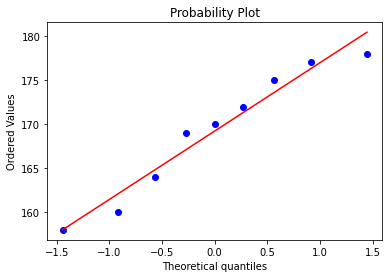

In [12]:
#QQ

stats.probplot(moms, dist='norm', plot=pylab)
pylab.show()

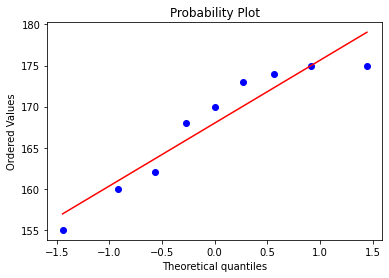

In [13]:
stats.probplot(dtrs, dist='norm', plot=pylab)
pylab.show()

Нам неизвестны дисперсии и мы не предполагаем, что они равно. Для оценки "статистической одинаковости" двух наборово будет использоваться партный t-тест

In [18]:
stats.ttest_ind(moms, dtrs)

Ttest_indResult(statistic=0.35581195161541973, pvalue=0.7266292679160495)

statistic=0.3558 - значение t-статистики

pvalue=0.7266

Так как *pvalue* больше, чем уровень значимости, значит принимаем нулевую гипотезу, т.е нет статистически значимых различий между ростом мам и их дочерей 